In [1]:
import sys
sys.path.insert(0  , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#plotting the datap point
def plot_data_points(X , y , marker , string):
    class0 = np.ones((0 , 2))
    class1 = np.ones((0 , 2))
    for indices in range(X.shape[0]):
        if (y[indices] == 0):
            class0 = np.vstack((class0 , np.array(X[indices])))
        else:
            class1 = np.vstack((class1 , np.array(X[indices])))
    plt.plot(class0[: , 0] , class0[: , 1] ,'b' , marker = marker ,linewidth = 0 , label = "class 0" + string)
    plt.plot(class1[: , 0] , class1[: , 1] , 'r' , marker = marker , linewidth = 0 , label = "class 1" + string)
    plt.xlabel('Feature 1')
    plt.ylabel("feature 2")

In [4]:
#There are two uncertainity functions 
#decision_function
#predict_proba
#most of the classifiers have one of the two functions
#some of them even have the both

#loading the training data and training a GradientBoostingClassifier to fit the dataset
from sklearn.datasets import make_blobs , make_circles
X , y = make_circles (noise = 0.25 , factor = 0.5 , random_state = 1)

#we rename the classes as red and blue for illustration purpose
y_names = np.array(["blue" , "red"])[y]

Text(0.5,1,'Data points')

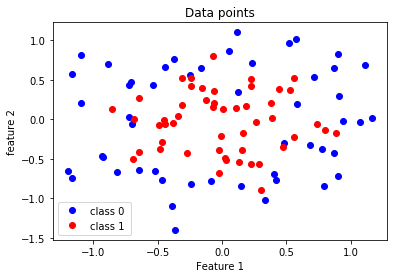

In [5]:
plot_data_points(X , y , 'o' , ' ')
plt.legend()
plt.title("Data points")

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train_named , y_test_named , y_train , y_test= train_test_split(X ,y_names,y, random_state = 0)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train , y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [8]:
print("Shape of X_test : " , X_test.shape)
print("Decision function shape : " , gbrt.decision_function(X_test).shape)

Shape of X_test :  (25, 2)
Decision function shape :  (25,)


In [9]:
#The value encodes how strongly the model believes that a data point belong to the positive class
# positive values indicate the preference for the positive class and negative values indicate the preference for
#the negative class
print("Some decision function values : \n" , gbrt.decision_function(X_test)[:6]  )

Some decision function values : 
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [10]:
#predicting the decision function values
print("Thresholded decision function : \n" , gbrt.decision_function(X_test) > 0)
print("Predictions : \n" , gbrt.predict(X_test))

Thresholded decision function : 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions : 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [11]:
#For binary class , negative class is the first entry of the class 
#positive class is the second entry of the class
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
if (np.all(pred == gbrt.predict(X_test))):
    print("The predictions are same")
else:
    print("Wrong answer")

The predictions are same


In [12]:
#The range of decision function is going to be different and depend on model parameters and the data
decision_value = gbrt.decision_function(X_test)
print("Minimum value : " , decision_value.min())
print("Maximum value : " , decision_value.max())

Minimum value :  -7.69097177301218
Maximum value :  4.289866676868515


In [13]:
#plotting the decision boundary
def decision_boundary (X , y , model):
    eps = 0.5
    x_min , x_max = X[: , 0].min() - eps , X[: , 0].max() + eps
    y_min , y_max = X[: , 1].min() - eps , X[: , 1].max() + eps
    
    xx = np.linspace(x_min , x_max)
    yy = np.linspace(y_min , y_max)
    X1 , X2 = np.meshgrid(xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]
    
    dec = model.decision_function(X_grid).reshape(X1.shape)
    plt.contourf(X1 , X2 , dec , alpha = 0.5 , levels = [dec.min() , 0 , dec.max()])
    

In [14]:
def plot_2d_score(X , y , model):
    eps = 0.5
    x_min , x_max = X[: , 0].min() - eps , X[: , 0].max() + eps
    y_min , y_max = X[: , 1].min() - eps , X[: , 1].max() + eps
    
    xx = np.linspace(x_min , x_max)
    yy = np.linspace(y_min , y_max)
    X1 , X2 = np.meshgrid(xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]
    
    function = getattr(model , "decision_function" , getattr(model , "predict_proba"))
    decision_values = function(X_grid)
    
    #plotting the imageshow
    plt.imshow(decision_values.reshape(X1.shape) , extent = (x_min , x_max , y_min , y_max) , aspect = 'auto' , 
              origin = 'lower' , alpha = 0.5 )
    #plt.colorbar()

Text(0.5,1,'decision boundary')

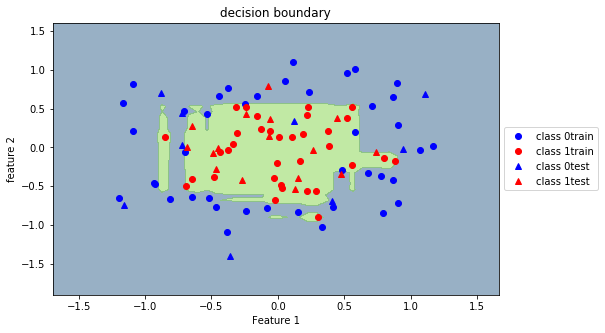

In [15]:
plt.figure(figsize = (8 , 5))
plot_data_points(X_train , y_train , 'o' , 'train')
plot_data_points(X_test , y_test , '^' , 'test')
decision_boundary(X , y , gbrt)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('decision boundary')

Text(0.5,1,'decision function')

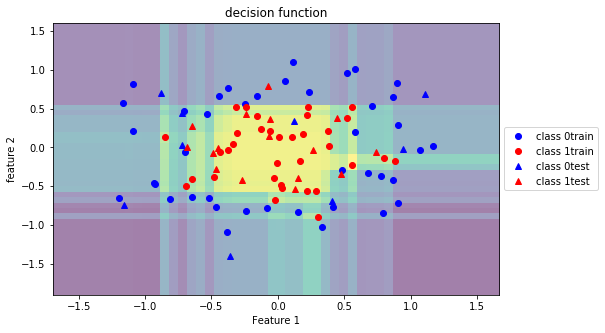

In [16]:
plt.figure(figsize = (8 , 5))
plot_data_points(X_train , y_train , 'o' , 'train')
plot_data_points(X_test , y_test , '^' , 'test')
plot_2d_score(X , y , gbrt)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('decision function')

In [17]:
#now using the prdict probability function
print("Shape of probabilities : " , gbrt.predict_proba(X_test).shape)

Shape of probabilities :  (25, 2)


In [18]:
#The first entry is the estimated probability of the first class
#The second entry is the estimated probability of the second class
#Both the probabilities lie between 0 and 1
#The one greater is predicted
print("Predicted probabilities : \n" , gbrt.predict_proba(X_test)[:6, :])

Predicted probabilities : 
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [19]:
#This time we show the class probabilities for the class 1
def plot_2d_score_prob(X , y , model):
    eps = 0.5
    x_min , x_max = X[: , 0].min() - eps , X[: , 0].max() + eps
    y_min , y_max = X[: , 1].min() - eps , X[: , 1].max() + eps
    
    xx = np.linspace(x_min , x_max)
    yy = np.linspace(y_min , y_max)
    X1 , X2 = np.meshgrid(xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]
    
    function = getattr(model , "predict_proba")
    decision_values = function(X_grid)[: , 1]
    
    #plotting the imageshow
    plt.imshow(decision_values.reshape(X1.shape) , extent = (x_min , x_max , y_min , y_max) , aspect = 'auto' , 
              origin = 'lower' , alpha = 0.5 )

Text(0.5,1,'probability of the data points')

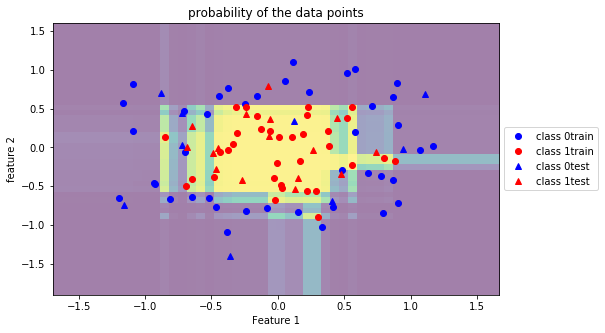

In [20]:
plt.figure(figsize = (8 , 5))
plot_2d_score_prob(X , y , gbrt)
plot_data_points(X_train , y_train , 'o' , 'train')
plot_data_points(X_test , y_test , '^' , 'test')
plt.legend(loc = 'center left' , bbox_to_anchor = (1 , 0.5))
plt.title('probability of the data points')

In [21]:
#Both these functions for multiclass classification
#Work with the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris.data , iris.target)
gbrt = GradientBoostingClassifier(learning_rate = 0.01 , random_state = 0)
gbrt.fit(X_train , y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [22]:
print("Decision function shape : " , gbrt.decision_function(X_test).shape)
print("Decision function values : \n" , gbrt.decision_function(X_test)[:6 , :])

#in the multi class classification the decision function have the dim = (n_samles , n_classes)
#Each col give the certainity score of the class
#large score more likely
#less score less likely

Decision function shape :  (38, 3)
Decision function values : 
 [[-0.50191386  1.23281092  0.73715427]
 [-0.50128519  1.46615067 -0.51895671]
 [-0.49886021  1.46615067 -0.51895671]
 [-0.49736367 -0.49638955  1.51369946]
 [-0.50128519  1.46615067 -0.51895671]
 [-0.50128519  1.46615067 -0.51895671]]


In [23]:
#recovering prediction
print("Argmax of decision function : \n" ,np.argmax(gbrt.decision_function(X_test) , axis = 1) )
print("Predicted values : \n" , gbrt.predict(X_test))

Argmax of decision function : 
 [1 1 1 2 1 1 1 2 1 2 2 1 1 0 0 0 0 2 0 2 1 0 2 2 2 2 0 1 1 0 2 2 2 2 0 0 1
 0]
Predicted values : 
 [1 1 1 2 1 1 1 2 1 2 2 1 1 0 0 0 0 2 0 2 1 0 2 2 2 2 0 1 1 0 2 2 2 2 0 0 1
 0]


In [24]:
#Dealing with predicted values
print("Predicted probability shape : " , gbrt.predict_proba(X_test).shape)
print("Predicted values : \n" , gbrt.predict_proba(X_test)[:6 , :])
#shape is (n_samples , n_classes)

Predicted probability shape :  (38, 3)
Predicted values : 
 [[0.09881655 0.56002972 0.34115373]
 [0.10947151 0.78297452 0.10755397]
 [0.10970813 0.78276647 0.10752539]
 [0.10557175 0.10567464 0.7887536 ]
 [0.10947151 0.78297452 0.10755397]
 [0.10947151 0.78297452 0.10755397]]


In [25]:
#predicting the values
print("argmax of the predicted values : \n" , np.argmax(gbrt.predict_proba(X_test) , axis = 1))
print("Predicted values : \n" , gbrt.predict(X_test))

argmax of the predicted values : 
 [1 1 1 2 1 1 1 2 1 2 2 1 1 0 0 0 0 2 0 2 1 0 2 2 2 2 0 1 1 0 2 2 2 2 0 0 1
 0]
Predicted values : 
 [1 1 1 2 1 1 1 2 1 2 2 1 1 0 0 0 0 2 0 2 1 0 2 2 2 2 0 1 1 0 2 2 2 2 0 0 1
 0]


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
named_target = iris.target_names[y_train]
logreg.fit(X_train , named_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
print("Classes in training set : " , iris.target_names)
print("Prediction : \n" , logreg.predict(X_test)[:10])
argmax = np.argmax(logreg.decision_function(X_test) , axis = 1)
print("argmax of the decision function : " , argmax[:10])
print("argmax combined with classes : \n" , logreg.classes_[argmax][:10])

Classes in training set :  ['setosa' 'versicolor' 'virginica']
Prediction : 
 ['virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica']
argmax of the decision function :  [2 1 1 2 1 1 1 2 1 2]
argmax combined with classes : 
 ['virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica']
